In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from pylab import *

In [2]:
#Standard NDVI
def compute_ndvi(RED,NIR):
    NDVI=(NIR-RED)/(NIR+RED)
    return NDVI

#Modified NDVI
def modified_ndvi(RED,NIR):
    RED=RED+0.02
    NDVI_MOD=(NIR-RED)/(NIR+RED)
    return NDVI_MOD


## Simulation  of surface reflectances with usual ranges of values

In [3]:
nb=10000

#random simulations of RED and NIR surface reflectances
RED=np.random.random_sample(nb)*0.1+0.01
NIR=np.random.random_sample(nb)*0.5+0.15

#Random simulation of noise (a little bit exaggerated)
NoiseR=np.random.normal(0,0.02,nb)
NoiseN=np.random.normal(0,0.02,nb)

#Add noise to reflectance
RED_noise=RED+NoiseR
NIR_noise=NIR+NoiseN

#Cast negative values to zero
RED_noise=np.where(RED_noise<0,0,RED_noise)


# Plot effect of noise on standard NDVI

Note the NDVI=1 values due to refectances in the red, equal or close to zero. In the NDVI formula, if the RED reflectance is zero, then NDVI equals one, whatever the value of the Near Infrared surface reflectance (except zero).

$$ NDVI=\frac{NIR-RED}{NIR+RED} $$

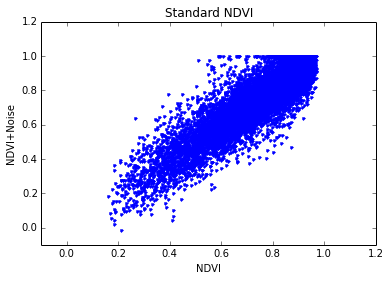

In [4]:
ndvi_ref=compute_ndvi(RED,NIR)
ndvi_noise=compute_ndvi(RED_noise,NIR_noise)


plot(ndvi_ref,ndvi_noise,'.')
ylim(-0.1,1.2)
xlim(-0.1,1.2)
title('Standard NDVI')
xlabel('NDVI')
ylabel('NDVI+Noise')
show()


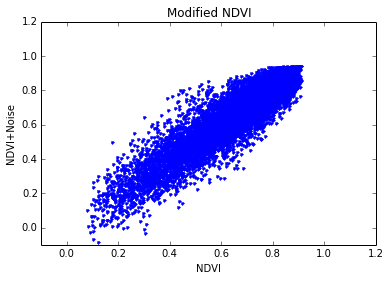

In [5]:
ndvi_ref=modified_ndvi(RED,NIR)
ndvi_noise=modified_ndvi(RED_noise,NIR_noise)


plot(ndvi_ref,ndvi_noise,'.')
ylim(-0.1,1.2)
xlim(-0.1,1.2)
title('Modified NDVI')
xlabel('NDVI')
ylabel('NDVI+Noise')
show()

**This plot looks much better !**